In [1]:
!pip install celluloid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import numpy
from numpy import *
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')
import matplotlib.pyplot as plt
from celluloid import Camera
import os
import zipfile
from google.colab import files
import matplotlib.animation as animation


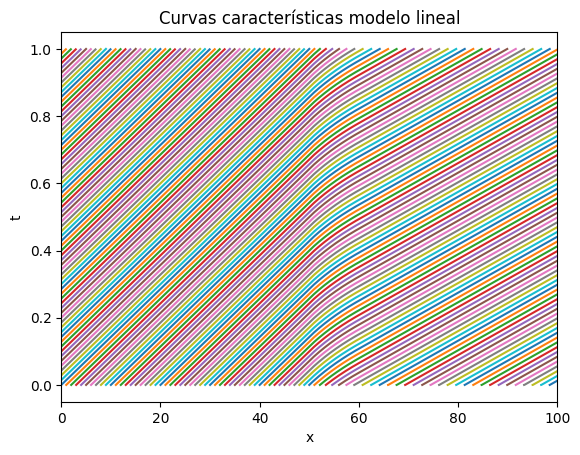

In [3]:
#APARTADO B
'''PRIMERO DEFINIMOS UNA FUNCION QUE, DADO UN x_0 CALCULE LOS VALORES EXTREMOS DE LA FUNCION
DEFINIDA A TROZOS x(s)
 '''
def extremos(x0):
    #LO QUE VALE s CUANDO x=50
    extremo1=(50-x0)/70
    # CUANDO x=60
    extremo2=log(12/7*exp((50-x0)/14))/5
    # Y CUANDO x=100
    extremo3=(40+24*extremo2*5)/120
    t=[extremo1,extremo2,extremo3]
    return t
#DEFINIMOS AHORA LA FUNCION QUE NOS VA A CALCULAR LAS CURVAS DADOS LOS EXTREMOS Y EL PUNTO INICIAL
def curvas(extremos,x0):
    #CREAMOS LO QUE VAN A SER LAS LISTAS FINALES DE ESPACIO Y TIEMPO
    t=[]
    x=[]
    #CREAMOS LOS VECTORES TEMPORALES EN CADA TRAMOS
    t1=linspace(0,extremos[0],1000)
    t2=linspace(extremos[0],extremos[1],1000)
    t3=linspace(extremos[1],extremos[2],1000)
    #Y LOS CONCATENAMOS EN EL VECTOR SOLUCION COMO UNA LISTA
    t=list(concatenate([t1,t2,t3]))
    #REALIZAMOS EL MISMO PROCESO CON LAS SOLUCIONES
    x1=70*t1+x0
    x2=36+14*exp((x0-50)/14+5*t2)
    x3=120*t3+60-24*log(12/7*exp((50-x0)/14))
    x=list(concatenate([x1,x2,x3]))
    '''FILTRAMOS TAN SOLO LOS VALORES DE t MAYORES O IGUALES QUE 0 PUES QUEREMOS
    QUE LOS COCHES VAYAN HACIA DELANTE EN EL TIEMPO
    '''
    t=[k for k in t if k >= 0]
    '''SE LOS QUITAMOS TAMBIEN A x APROVECHANDO QUE ESTA ES CRECIENTE '''
    x=x[int((len(t1)+len(t2)+len(t3)-len(t))):]
    '''NO NOS INTERESAN LOS VALORES MAYORES QUE t=1 '''
    if max(t)>=1:
        t=[k for k in t if k <= 1]
        x=x[:-(3000-len(t))]
    return x,t
#CREAMOS EL VECTOR DE DATOS INCIALES
x0=arange(-100,100,1)
#PINTO MIS FUNCIONES PARA CADA VALOR DE x_0
for i in range(0,len(x0)):
    t=extremos(x0[i])
    x,t=curvas(t,x0[i])
    plt.plot(x,t)
plt.xlabel('x')
plt.ylabel('t')
plt.title('Curvas características modelo lineal')
plt.xlim([0,100])
plt.show()

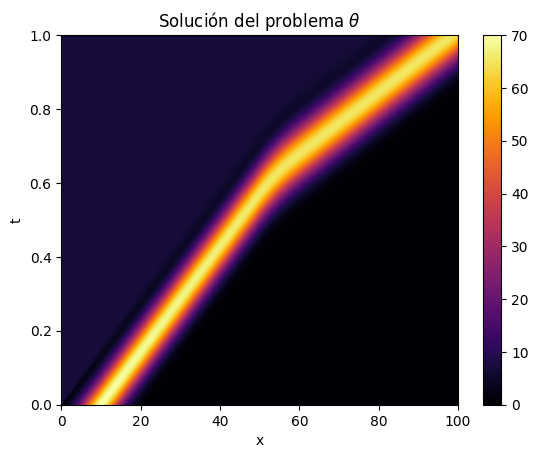

In [8]:
#APARTADO C
#DECLARAMOS LAS VARIABLES QUE VAMOS A UTILIZAR DURANTE LA PRÁCTICA
x,t,CC,CI,v,lambda_,dx,dt,nt,nx,solucion_theta=[],[],[],[],[],[],[],[],[],[],[]
#DEFINIMOS LA FUNCION QUE NOS VA A CALCULAR LA SOLUCION
def solucion():
    global x,t,CC,CI,v,lambda_,dx,dt,nt,nx,solucion_theta
    #INICIALIZAMOS LA MATRIZ SOLUCION CON LAS CC Y LA CI
    solucion=zeros((len(t),len(x)))
    solucion[0,:]=CI
    solucion[:,0]=CC
    #INICIALIZAMOS EL BUCLE QUE NOS DARA LA SOLUCION 
    for k in range(1,len(t)-1):
        #CALCULAMOS LA SOLUCION EN CADA FILA DEL MALLADO
        solucion[k,1:]=solucion[k-1,1:]*(1-lambda_*v[1:])+lambda_*v[1:]*solucion[k-1,:-1]
    #LAS PLOTEAMOS
    plt.pcolormesh(x,t,solucion,cmap='inferno')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title(r'Solución del problema $\theta$')
    plt.colorbar()
    plt.show()
    return solucion
def main():
    global x,t,CC,CI,v,lambda_,dx,dt,nt,nx,solucion_theta
    #DEFINIMOS LOS PARAMETROS DEL PROBLEMA DE ACUERDO CON LA CONDICION CFL
    nx=1000
    dx=100/nx
    dt=dx/120
    lambda_=dt/dx
    x=arange(0,100+dx,dx)
    t=arange(0,1+dt,dt)
    #CREAMOS LA MATRIZ V Y LOS ARRAYS DE CC Y CI
    v=concatenate((70*ones(len(array([k for k in x if k <= 50]))),70+50*(1-(60-array([k for k in x if k> 50 and k<=60 ]))/10),120*ones(len(array([k for k in x if k > 60])))))
    CI=v*exp(-abs(x-10)**(2)/25)
    CC=7*ones(len(t))
    #LANZAMOS LA SOLUCION
    solucion_theta=solucion()
if __name__ == '__main__':
    main()  

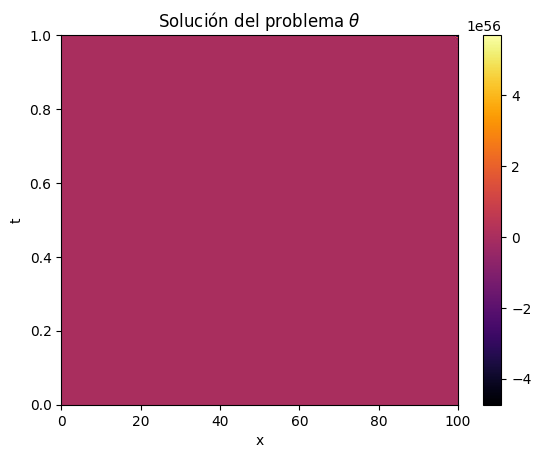

In [5]:
#APARTADO E - VIOLACION DE LA CONDICION CFL

nx=1000
dx=100/nx
#IMPONEMOS QUE SE DEJE DE CUMPLIR LA CONDICIÓN SIMPLEMENTE DIVIDIENDO POR UN NÚMERO MENOR QUE 120
dt=dx/100
lambda_=dt/dx
x=arange(0,100+dx,dx)
t=arange(0,1+dt,dt)
v=concatenate((70*ones(len(array([k for k in x if k <= 50]))),70+50*(1-(60-array([k for k in x if k> 50 and k<=60 ]))/10),120*ones(len(array([k for k in x if k > 60])))))
CI=v*exp(-abs(x-10)**(2)/25)
CC=7*ones(len(t))
solucion_theta=solucion()



In [16]:
#APARTADO F

#CREAMOS UNA FUNCIÓN QUE NOS VA A PERMITIR ITERAR LOS PLOTS Y REALIZAR LA ANIMACIÓN
fig,ax=plt.subplots()
def itera(i):
    ax.clear()
    ax.plot(x, solucion[int(10*i),:],linestyle='solid',color='red',label='Tiempo: t= '+str(round(float(t[int(10*i)]),3)) + ' h')
    ax.set_title(r'Evolución del modelo lineal $u(x,t)$')
    ax.set_xlabel('x')
    ax.set_ylabel('u(x,t)')
    ax.legend()
    ax.set_xlim(0, 100)  
    ax.set_ylim(0, 1) 

#EXTENDEMOS NUESTRA MATRIZ V AL TAMAÑO DE LA SOLUCION Y DESHACEMOS EL CAMBIO
vmax=tile(v,(len(t), 1))
solucion=array(solucion_theta/vmax)
#CREAMOS LA ANIMACION Y LA GUARDAMOS
ani = animation.FuncAnimation(fig, itera, frames=int(len(t)/10), interval=100, repeat=True)  
ani.save('modelo_lineal.gif', writer='imagemagick')



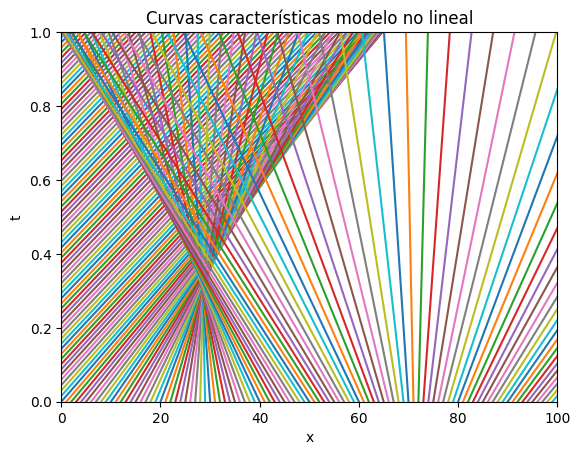

In [18]:
#APARTADO G
#DEFINIMOS LA FUNCION QUE NOS CALCULA LAS CURVAS
def curvas_2(x0,t):
    x=x0+(72-120*exp(-(abs(x0-50)/30)**2))*t
    return x
#DEFINIMOS EL VECTOR DE DATOS INICIALES
x0=arange(-100,100,1)
t2=linspace(0,1,100)
#LLAMAMOS A LA SOLUCION Y LA PLOTEAMOS
for i in range(0,len(x0)):
    x2=curvas_2(x0[i],t2)
    plt.plot(x2,t2)
plt.xlim((0,100))
plt.ylim((0,1))
plt.xlabel('x')
plt.ylabel('t')
plt.title('Curvas características modelo no lineal')
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

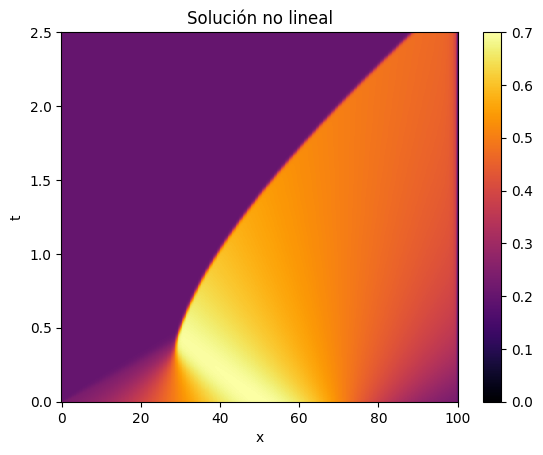

In [17]:
#APARTADO H

#DEFINIMOS LAS VARIABLES QUE NOS FALTAN
CC1,CC2,solucionu,f=[],[],[],[]
def solucion_2():
  global x,t,CC1,CC2,CI,f,dx,dt,solucionu
  #IMPONEMOS LAS CONDICIONES DEL PROBLEMA
  solucionu=zeros((len(t),len(x)))
  solucionu[0,:]=CI
  solucionu[:,0]=CC1
  solucionu[:,len(x)-1]=CC2
  f=120*solucionu.copy()*(1-solucionu.copy())
  #ITERAMOS LA OBTENCIÓN DE LA SOLUCIÓN 
  for k in range(1,len(t)-1):
    solucionu[k,1:-1]=0.5*(solucionu[k-1,2:]+solucionu[k-1,:-2])-0.5*dt/dx*(f[k-1,2:]-f[k-1,:-2])
    f[k,1:-1]=120*solucionu[k,1:-1]*(1-solucionu[k,1:-1])
#DEFINIMOS UNA FUNCIÓN QUE SE VA A DEDICAR A REALIZAR LAS ITERACIONES TEMPORALES
def itera(i):
    ax.clear()
    ax.plot(x, solucionu[int(10*i),:],linestyle='solid',color='red',label='Tiempo: t= '+str(round(float(t[int(10*i)]),3)) + ' h')
    ax.set_title(r'Evolución del modelo no lineal $u(x,t)$')
    ax.set_xlabel('x')
    ax.set_ylabel('u(x,t)')
    ax.legend()
    ax.set_xlim(0, 100)  
    ax.set_ylim(0, 1) 

def main(): 
  global x,t,CC1,CC2,CI,f,dx,dt,solucionu
  #METEMOS LOS PARÁMETROS QUE SE NOS INDICAN
  dx=0.2
  dt=dx/120
  x=arange(0,100+dx,dx)
  t=arange(0,2.5+dt,dt)
  CI=0.2+0.5*exp(-((x-50)/30)**2)
  CC1=0.2*ones(len(t))
  CC2=0.2*ones(len(t))
  #EJECUTAMOS LA SOLUCIÓN
  solucion_2()
  plt.close()
  plt.figure()
  #CREAMOS LA ANIMACION DESEADA
  ani = animation.FuncAnimation(fig, itera, frames=int(len(t)/10), interval=100, repeat=True)  
  ani.save('modelo_no_lineal.gif', writer='imagemagick')
  #PINTAMOS LA SOLUCIÓN
  plt.pcolormesh(x,t,solucionu,cmap='inferno')
  plt.xlabel('x')
  plt.ylabel('t')
  plt.title('Solución no lineal')
  plt.colorbar()
  plt.show()
  
if __name__ == '__main__':
    main()  